<a href="https://colab.research.google.com/github/EON-LEE/Course-DeepLearning/blob/main/Week13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

딥러닝 13주차 강의

# Mnist Classification Using CNN

## Import

In [14]:
# tensorflow 모듈 import 
import tensorflow as tf
# 샘플 이미지 출력
import matplotlib.pylab as plt

## Dataset Load

In [4]:

# MNIST 손글씨 이미지 데이터 로드
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_valid, y_valid) = mnist.load_data()

print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


## Preprocessing

In [5]:
# 정규화(Normalization)
x_train = x_train / 255.0
x_valid = x_valid / 255.0

print(x_train.min(), x_train.max())
print(x_valid.min(), x_valid.max())

0.0 1.0
0.0 1.0


In [9]:
# 채널 추가
print(x_train.shape, x_valid.shape)

x_train_in = x_train[..., tf.newaxis]
x_valid_in = x_valid[..., tf.newaxis]

print(x_train_in.shape, x_valid_in.shape)

(60000, 28, 28) (10000, 28, 28)
(60000, 28, 28, 1) (10000, 28, 28, 1)


## Build Model

In [6]:
# Sequential API를 사용하여 샘플 모델 생성
model = tf.keras.Sequential([
    # Convolution 적용 (32 filters)
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', 
                           input_shape=(28, 28, 1), name='conv'),
    # Max Pooling 적용
    tf.keras.layers.MaxPooling2D((2, 2), name='pool'),
    # Classifier 출력층 
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='softmax'),
])

In [7]:
# 모델 컴파일
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

## Training

In [10]:
# 모델 훈련
history = model.fit(x_train_in, y_train, 
                    validation_data=(x_valid_in, y_valid), 
                    epochs=10)

Epoch 1/10
1875/1875 [==============================] - 20s 10ms/step - loss: 0.2150 - accuracy: 0.9384 - val_loss: 0.0868 - val_accuracy: 0.9743
Epoch 2/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0809 - accuracy: 0.9760 - val_loss: 0.0629 - val_accuracy: 0.9800
Epoch 3/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0616 - accuracy: 0.9818 - val_loss: 0.0582 - val_accuracy: 0.9803
Epoch 4/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0512 - accuracy: 0.9850 - val_loss: 0.0555 - val_accuracy: 0.9821
Epoch 5/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0436 - accuracy: 0.9871 - val_loss: 0.0541 - val_accuracy: 0.9821
Epoch 6/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0368 - accuracy: 0.9890 - val_loss: 0.0527 - val_accuracy: 0.9831
Epoch 7/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0318 - accuracy: 0.9902 - val_loss: 0.0552 -

## Evaluation

In [11]:
model.evaluate(x_valid_in, y_valid)

313/313 [==============================] - 1s 4ms/step - loss: 0.0563 - accuracy: 0.9834


[0.0563371442258358, 0.9833999872207642]

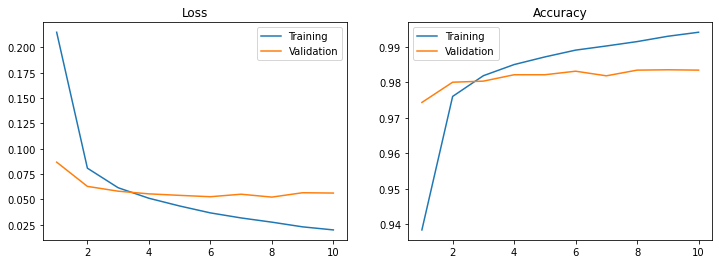

In [15]:
def plot_loss_acc(history, epoch):

    loss, val_loss = history.history['loss'], history.history['val_loss']
    acc, val_acc = history.history['accuracy'], history.history['val_accuracy']

    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    axes[0].plot(range(1, epoch + 1), loss, label='Training')
    axes[0].plot(range(1, epoch + 1), val_loss, label='Validation')
    axes[0].legend(loc='best')
    axes[0].set_title('Loss')

    axes[1].plot(range(1, epoch + 1), acc, label='Training')
    axes[1].plot(range(1, epoch + 1), val_acc, label='Validation')
    axes[1].legend(loc='best')
    axes[1].set_title('Accuracy')

    plt.show()

plot_loss_acc(history, 10)

## Debug - Layer 시각화

In [16]:
# 모델 구조 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv (Conv2D)               (None, 26, 26, 32)        320       
                                                                 
 pool (MaxPooling2D)         (None, 13, 13, 32)        0         
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 10)                54090     
                                                                 
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
_________________________________________________________________


In [17]:
# 입력 텐서 형태 
model.input

<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'conv_input')>

In [18]:
# 출력 텐서 형태 
model.output

<KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'dense')>

In [19]:
# 레이어 
model.layers

In [20]:
# 첫번째 레이어 선택
model.layers[0]

In [21]:
# 첫번째 레이어 입력
model.layers[0].input

<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'conv_input')>

In [22]:
# 첫번째 레이어 출력
model.layers[0].output

<KerasTensor: shape=(None, 26, 26, 32) dtype=float32 (created by layer 'conv')>

In [23]:
# 첫번째 레이어 가중치
model.layers[0].weights

[<tf.Variable 'conv/kernel:0' shape=(3, 3, 1, 32) dtype=float32, numpy=
 array([[[[ 0.07029902,  0.27966362, -0.692573  , -0.75230676,
           -1.0953985 , -0.47225645, -0.10007493, -0.06998134,
           -0.5259011 , -0.4136013 , -0.05983668,  0.3498379 ,
            0.3780798 , -0.45326456,  0.30585763, -0.85591435,
            0.2233776 ,  0.29182342, -0.75104445,  0.44896963,
            0.35156786, -0.72721905,  0.27262494, -1.3453225 ,
           -0.00895126,  0.09847702,  0.06215843,  0.2300827 ,
           -0.5777116 , -0.30639017,  0.25923008, -0.42104217]],
 
         [[ 0.39762378,  0.38155663, -0.599769  , -0.63635004,
           -0.03303982,  0.11878478,  0.18175119,  0.87108415,
           -0.07818958, -0.14991911, -0.59687185,  0.5712462 ,
            0.2201214 ,  0.33401814,  0.40945426, -0.19882874,
           -0.38216954,  0.10323902, -1.3589977 , -0.06657505,
            0.20912096,  0.16655917,  0.26562756, -0.64606386,
            0.20250268,  0.12897353,  0.09

In [ ]:
# 샘플 이미지의 레이어별 출력을 리스트에 추가 (첫번째, 두번째 레이어)
activator = tf.keras.Model(inputs=model.input, 
                           outputs=[layer.output for layer in model.layers[:2]] ) 
activations = activator.predict(x_train_in[0][tf.newaxis, ...]) 

len(activations)